In [1]:
import pandas as pd
import os
import numpy as np


In [21]:
df = pd.read_csv(os.path.join(os.getcwd(), '../resources/accuracy_set.csv'), index_col=0, dtype={'input' : object, 'output': object})

drop_columns = ['Unnamed: 0', 'SynBioHub URI', 'Unnamed: 0.1', 'calibration_id', 'experiment_id', 'filename', 
                'glycerol_plate_index',  'growth_media_1', 'growth_media_2',  
                'inc_temp', 'inc_time_1', 'inc_time_2', 'input', 'lab', 'lab_id', 'media', 'od', 
                'od_cutoff', 'output', 'part_1_id', 'part_2_id', 'plate_id',  'replicate', 'source_container', 
                'strain_name', 'strain_circuit', 'well', 'post_well']
od_df = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv')).rename(columns={'strain' : 'strain_name'}).drop(columns=drop_columns)
df = df.merge(od_df, on='id', how='left')



In [22]:
correctness_col='mean_correct_classifier_live'
conditions=['inc_time_2', 'media', 'inc_temp', 'od']
design=['gate', 'input']


# Strain x condition scores is mean of samples for condition
strain_score_df = df.groupby(conditions+design)[correctness_col].agg(np.mean).reset_index()

# Circuit x condition score is mean of strains comprising the circuit
#circuit_score_df = strain_score_df.groupby(conditions+['gate']).agg(np.mean).reset_index()
circuit_score_df = strain_score_df.groupby(['gate'])[correctness_col].agg(np.product).reset_index()

# Robustness is the std deviation of the score across all conditions
circuit_robustness_df = circuit_score_df.groupby(['gate'])[correctness_col].agg([np.mean, np.std]).reset_index().sort_values(by=['mean']).rename(columns={'mean' : 'Mean Correctness', 'std' : 'Std. Dev. Correctness', 'gate' : 'Gate'})
circuit_robustness_df.loc[:, 'robustness'] = circuit_robustness_df.apply(lambda x: 1.0- x[correctness_col], axis=1)
circuit_robustness_df = circuit_robustness_df.drop(columns=[correctness_col]).sort_values(by=['robustness'])
circuit_robustness_df
#circuit_score_df

KeyError: ('mean_correct_classifier_live', 'occurred at index 3')

In [5]:
circuit_score_df

,inc_time_2,media,inc_temp,od,gate,mean_correct_classifier_live
0,8.0,standard_media,30.0,0.000020,AND,0.878244
1,8.0,standard_media,30.0,0.000020,NAND,0.499743
2,8.0,standard_media,30.0,0.000020,NOR,0.659334
3,8.0,standard_media,30.0,0.000020,OR,0.595497
4,8.0,standard_media,30.0,0.000020,XNOR,0.775876
5,8.0,standard_media,30.0,0.000020,XOR,0.588964
6,8.0,standard_media,30.0,0.000039,AND,0.792460
7,8.0,standard_media,30.0,0.000039,NAND,0.424803
8,8.0,standard_media,30.0,0.000039,NOR,0.712069
9,8.0,standard_media,30.0,0.000039,OR,0.578009


In [26]:
# Strain Robustness
correctness_col='mean_correct_classifier_live'
conditions=['inc_time_2', 'media', 'inc_temp', 'od']
design=['gate', 'input']


# Strain x condition scores is mean of samples for condition
strain_score_df = df.groupby(conditions+design).agg(np.mean).reset_index()
strain_score_df.loc[:, 'proportion_live'] = strain_score_df.apply(lambda x: x['count_live']/x['count'], axis=1)
strain_score_df

# Robustness is the std deviation of the score across all conditions
strain_robustness_df = strain_score_df.groupby(design)[correctness_col].agg(np.std).reset_index()
strain_robustness_df.loc[:, 'robustness'] = strain_robustness_df.apply(lambda x: 1.0- x[correctness_col], axis=1)
strain_robustness_df = strain_robustness_df.drop(columns=[correctness_col]).sort_values(by=['gate', 'input'])

strain_robustness_df=strain_robustness_df.merge(strain_score_df.groupby(['gate', 'input'])['proportion_live', 'post_od_raw', 'od'].agg(np.mean).reset_index(), on=['gate', 'input'])
strain_robustness_df.sort_values(by=['robustness']) #.loc[strain_robustness_df['gate'] == 'OR'].reset_index().drop(columns=['index'])

strain_robustness_df

,gate,input,robustness,proportion_live,post_od_raw,od
0,AND,00,0.966257,0.896350,0.556506,0.008676
1,AND,01,0.923786,0.875868,0.632544,0.005580
2,AND,10,0.950145,0.890315,0.409870,0.004745
3,AND,11,0.815147,0.620045,0.437623,0.004778
4,NAND,00,0.863536,0.627766,0.542442,0.003509
5,NAND,01,0.785252,0.648232,0.700108,0.005176
6,NAND,10,0.774347,0.674626,0.638255,0.006550
7,NAND,11,0.686165,0.634079,0.491067,0.006570
8,NOR,00,0.836327,0.466995,0.501504,0.009682
9,NOR,01,0.901629,0.909496,0.420216,0.009498


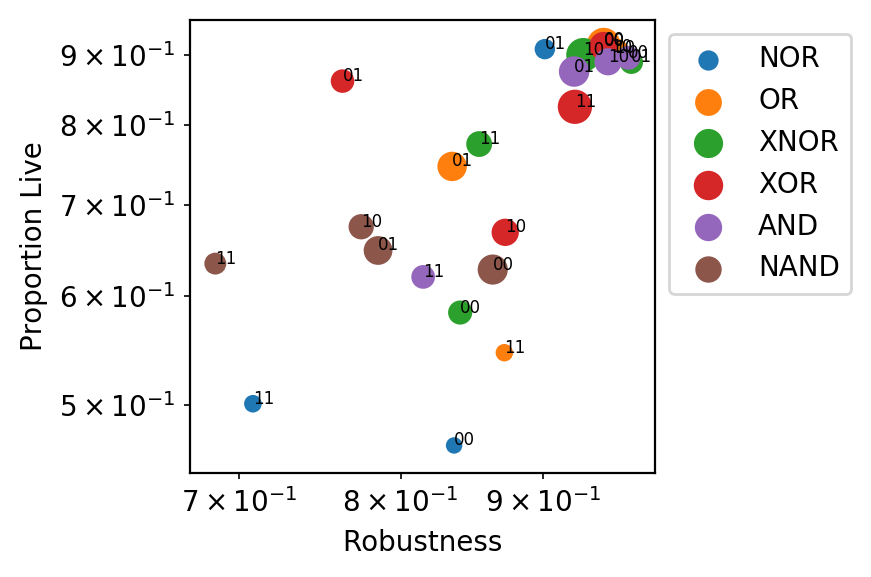

In [28]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


stats=df.groupby(['gate', 'input'])['mean_correct_classifier_live'].agg([np.mean, stats.sem, np.std]).reset_index().sort_values(by='sem')

fig = plt.figure(dpi=200, figsize=(3,3))
ax = fig.add_subplot(111)
for gate in stats.gate.unique():
    stats_g = strain_robustness_df.loc[strain_robustness_df.gate == gate]
    ax.scatter(stats_g['robustness'], stats_g['proportion_live'], label = gate, s=stats_g['proportion_live']*stats_g['post_od_raw']/stats_g['od'])
    for inp in stats_g.input.unique():
        stats_gi = stats_g.loc[stats_g.input == inp]
        ax.annotate(inp, (stats_gi['robustness'], stats_gi['proportion_live']), fontsize=6)


#ax.scatter(strain_robustness_df['robustness'], strain_robustness_df['proportion_live'])

ax.set_xlabel('Robustness')
ax.set_ylabel('Proportion Live')
#ax.set_ylim([0,1])
#ax.set_xlim([0,1])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1))

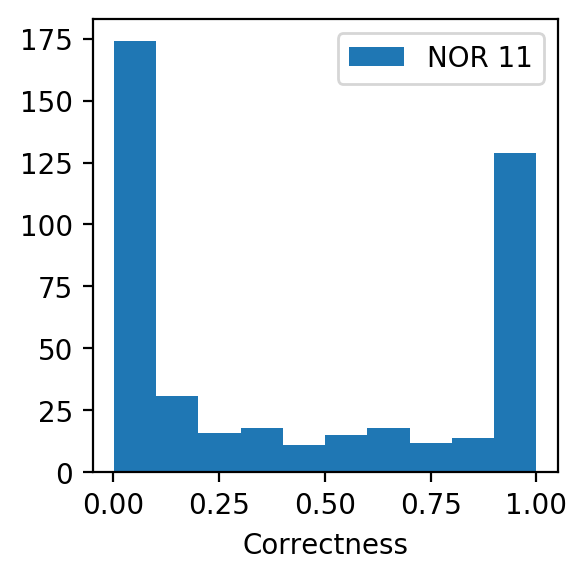

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


#stats=df.groupby(['gate', 'input'])['mean_correct_classifier_live'].agg([np.mean, stats.sem, np.std]).reset_index().sort_values(by='sem')

fig = plt.figure(dpi=200, figsize=(3,3))
ax = fig.add_subplot(111)
gate='NOR'
inp='11'
#for gate in stats.gate.unique():
stats_g = df.loc[(df.gate == gate) & (df.input == inp)]
stats_g.loc[:, 'proportion_live'] = stats_g.apply(lambda x: x['count_live']/x['count'], axis=1)
col='mean_correct_classifier_live'
#col='proportion_live'
ax.hist(stats_g[col], label = gate + " " + inp)

#ax.scatter(strain_robustness_df['robustness'], strain_robustness_df['proportion_live'])

ax.set_xlabel('Correctness')
#ax.set_ylabel('Proportion Live')
#ax.set_ylim([0,1])
#ax.set_xlim([0,1])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1))

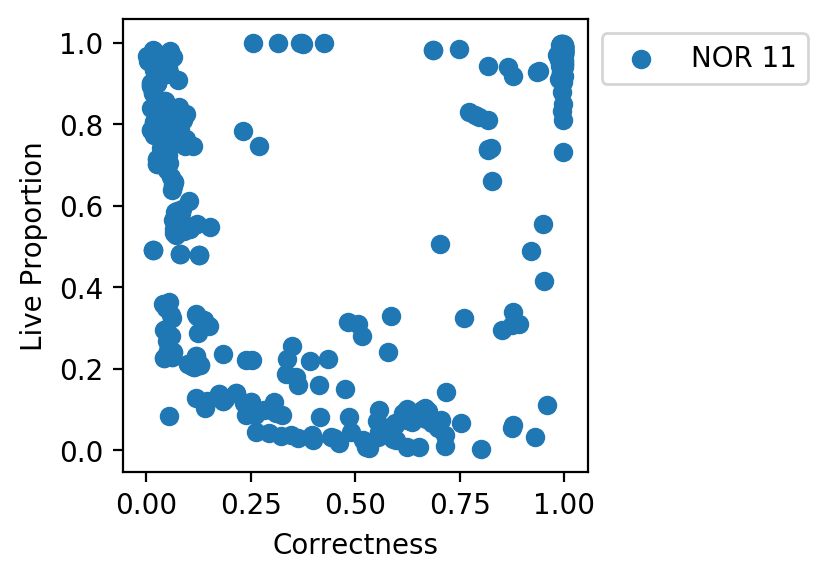

In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


#stats=df.groupby(['gate', 'input'])['mean_correct_classifier_live'].agg([np.mean, stats.sem, np.std]).reset_index().sort_values(by='sem')

fig = plt.figure(dpi=200, figsize=(3,3))
ax = fig.add_subplot(111)
gate='NOR'
inp='11'
#for gate in stats.gate.unique():
stats_g = df.loc[(df.gate == gate) & (df.input == inp)]
stats_g.loc[:, 'proportion_live'] = stats_g.apply(lambda x: x['count_live']/x['count'], axis=1)
col1='mean_correct_classifier_live'
col2='proportion_live'
ax.scatter(stats_g[col1], stats_g[col2], label = gate + " " + inp)

#ax.scatter(strain_robustness_df['robustness'], strain_robustness_df['proportion_live'])

ax.set_ylabel('Live Proportion')
ax.set_xlabel('Correctness')
#ax.set_ylabel('Proportion Live')
#ax.set_ylim([0,1])
#ax.set_xlim([0,1])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1))